In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from collections import OrderedDict
df = pd.read_csv('HK.02007.csv')

In [2]:
#POC
#df

In [3]:
df['time_key'] = pd.to_datetime(df['time_key'])
symbol = df['code'][0]

In [4]:
df = df.set_index('time_key')
df1 = df.resample('24H').agg(
    OrderedDict([
        ('open', 'first'),
        ('high', 'max'),
        ('low', 'min'),
        ('close', 'last'),
        ('volume', 'sum'),
        ('turnover', 'sum'),
    ])
)['2020-07-03':]

In [5]:
df1=df1.dropna()

In [6]:
#POC
#for index, row in df1.iterrows():
#    print(index, row['open'])


In [7]:
# Main Logic
winnerthreshold = 0.995
loserthreshold = 1.005

for index, row in df1.iterrows():
    # need to use string to do filter by date
    # result in copied dataframe, otherwise in array
    subset = df[index.strftime('%Y-%m-%d')].copy()
    thresholdprice = row['close']
    winner=0
    loser=0
    totalturnover = 0
    for index1, row1 in subset.iterrows():
        hlc4 = (row1['open']+row1['high']+row1['low']+row1['close'])/4
        #hlc4=row1['close']
        totalturnover=totalturnover+row1['turnover']
        if hlc4 < thresholdprice * winnerthreshold:
            winner=winner+row1['turnover']
        
        if hlc4 < thresholdprice * loserthreshold:
            loser=loser+row1['turnover']
            
            
    redpct = winner / totalturnover 
    greenpct = loser / totalturnover 
    #row['redpct'] = redpct
    df1.loc[index,'redpct'] = redpct
    df1.loc[index,'greenpct'] = 1 - greenpct
    df1.loc[index,'date'] = index.strftime('%Y-%m-%d')


In [8]:
#POC
#df1

In [9]:
df1['R'] = df1['redpct'].rolling(5).mean()
df1['G'] = df1['greenpct'].rolling(5).mean()
df2 = df1.assign(Y=1-df1.R -df1.G)
#df2

In [10]:
result = df2[['date','close','R','Y','G']]

In [11]:
#POC for build pandas chart
#result.plot.bar(stacked=True)

In [12]:
#Got better display below

#import matplotlib.dates as mdates
#
##f, ax = plt.subplots(figsize=(20,5)) # set the size that you'd like (width, height)
#data = {'r': result['R'],
#        'y':  result['Y'],
#        'g': result['G']}
#
#data1 = {'c': result['close']}
#
#dfc = pd.DataFrame(data, index=result['date'])
#ax = dfc.plot(kind='bar', stacked=True, figsize=(22, 5), color= ["r","y","g"])
#
#
#ax.set_ylabel(symbol)
#plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
#plt.savefig(symbol + '.png')  # if needed


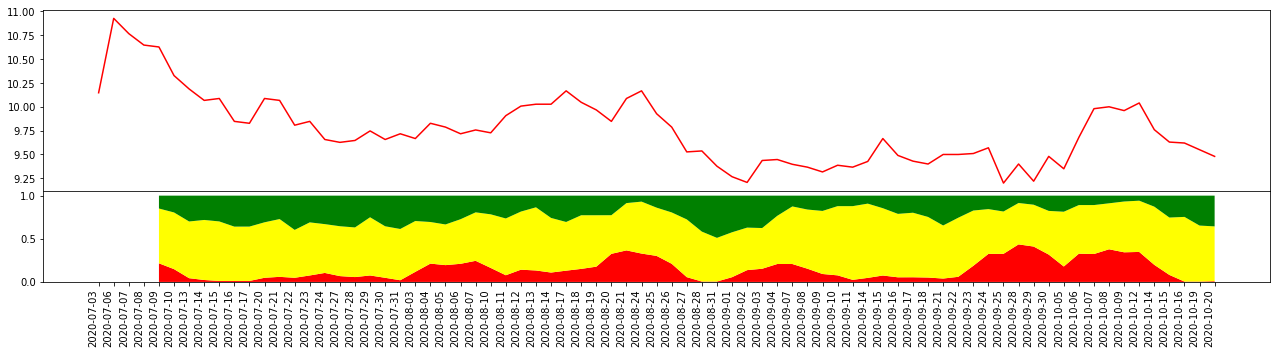

<Figure size 432x288 with 0 Axes>

In [21]:
# Simple data to display in various forms
x = result['date']
y = result['close']

fig = plt.figure( figsize=(22, 5))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
# log scale for axis Y of the first subplot
#ax0.set_yscale("log")
line0, = ax0.plot(x, y, color='r')

r = result['R']
g = result['G']
y = result['Y']

#the second subplot
# shared axis X
data = {'r': result['R'],
        'y':  result['Y'],
        'g': result['G']}
ax1 = plt.subplot(gs[1], sharex = ax0)


# Plot x-labels, y-label and data 
ax1.plot([], [], color ='red',  
         label ='R') 
ax1.plot([], [], color ='yellow', 
         label ='Y') 
ax1.plot([], [], color ='green', 
         label ='G') 
ax1.stackplot(x, r, y, g, colors =['red', 'yellow',  
                       'green'])
#ax1.bar(x, g,  color= 'g', bottom=y)
#ax1.bar(x, y,  color= 'y', bottom=r)
#ax1.bar(x, r,  color= 'r')


plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)


plt.xticks(rotation=90, ha='right')


# put lened on first subplot
#ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
plt.show()
plt.savefig(symbol + '.png') 

In [14]:
#POC
#df1['close'].plot(figsize=(18, 5))

In [15]:
#POC
#df1

In [16]:
!pip install mplfinance

In [17]:
#POC
#result.loc['R']

In [18]:
#poc
#df['2017-09-28']

In [19]:
#poc
#df['2017-09-28'].copy()

In [20]:
#poc
#df